># Titanic Survival Dataset Exploratory Data Analysis

>### In this project, I will be analyzing data associated with the tragic event of sinking Titanic. In particular, I will be interested in finding trends among the passengers who survived, and how they differ from the passengers who didn't survive. 
>### I will use Python to do exploratory data analysis towards this dataset. 
>### I got this dataset from Kaggle: https://www.kaggle.com/c/titanic/data

### Prepartion

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#Load the dataset
df = pd.read_csv(r'C:\Users\19802\Desktop\Career hunting\Projects\Python EDA\Titanic\titanic\train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###  Ask questions

>### Question 1: How many people survived?
>### Question 2: What kind of features are associated with survival rate?

### Data Wrangling

In [3]:
#Understand the variables
df.Survived.unique() #0, 1
df.Pclass.unique()   #1, 2, 3
df.Sex.unique()      #male, female
df.SibSp.unique()    #Number of Sibling or Spouse on board, 0, 1, 2, 3, 4, 5, 8
df.Parch.unique()    #Number of Parent or Children on board 0, 1, 2, 3, 4, 5, 6
df.Fare.unique()     #too many, need check distribution
df.Embarked.unique() #S, C, Q, Nan

array(['S', 'C', 'Q', nan], dtype=object)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
#check duplicates
sum(df.duplicated()) #--> No duplicates

0

In [6]:
#drop variables I don't need here
df = df.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


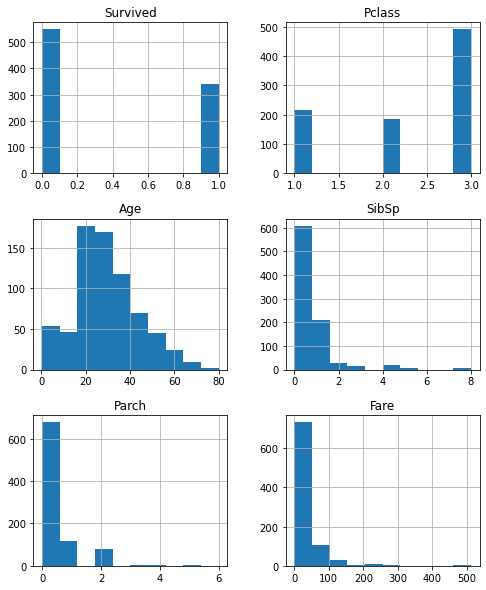

In [7]:
#Overall distribution
df.hist(figsize = (8, 10));

In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.info()
#Missing values are in Age and Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


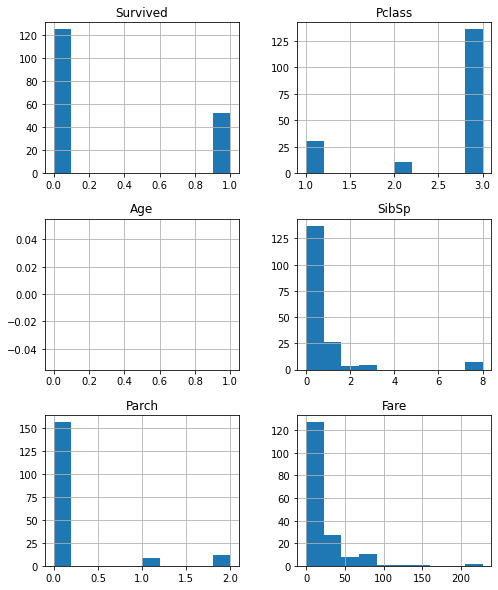

In [10]:
df[df.Age.isnull()].hist(figsize = (8, 10));

In [11]:
#Since missing values of Age are not too off compared to overall distribution, fill missing values with mean
df.fillna(df.mean(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [12]:
#Missing values in Embarked
df[df.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [13]:
#drop these two rows with missing embarked
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Exploratory Data Analysis

>### Question 1: How many people survived?

In [15]:
df_survived = df.query('Survived == 1')
df_died = df.query('Survived == 0')

df_survived.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 1 to 889
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  340 non-null    int64  
 1   Pclass    340 non-null    int64  
 2   Sex       340 non-null    object 
 3   Age       340 non-null    float64
 4   SibSp     340 non-null    int64  
 5   Parch     340 non-null    int64  
 6   Fare      340 non-null    float64
 7   Embarked  340 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 23.9+ KB


>>#### Answer 1: 342 people survived (about 38%). (340 entries + 2 embarked missing)

> ### Question 2: Is higher fare associated with higher chance of survivial?

In [16]:
df_survived.Fare.mean()

48.209498235294106

In [17]:
df_died.Fare.mean()

22.117886885245877

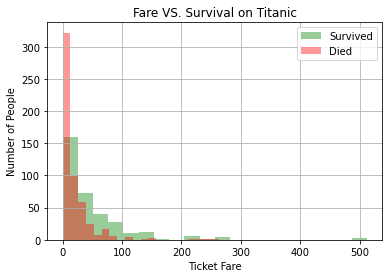

In [18]:
df_survived.Fare.hist(alpha = 0.4, color = 'Green', bins = 20, label = 'Survived')
df_died.Fare.hist(alpha = 0.4, color = 'Red', bins = 20, label = 'Died')
plt.title('Fare VS. Survival on Titanic')
plt.xlabel('Ticket Fare')
plt.ylabel('Number of People')
plt.legend()

>>#### Answer 2: For people who has paid higher fare, the survival rate is higher. There is much more people died than survived for people who paid between 0-20.

>### Question 3: Is ticket class associated with survival?

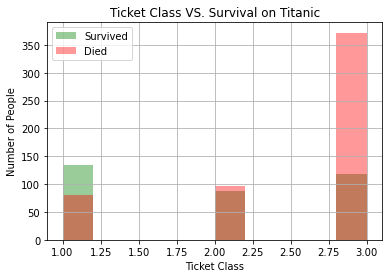

In [19]:
df_survived.Pclass.hist(alpha = 0.4, color = 'Green', label = 'Survived')
df_died.Pclass.hist(alpha = 0.4, color = 'Red', label = 'Died')
plt.title ('Ticket Class VS. Survival on Titanic')
plt.xlabel('Ticket Class')
plt.ylabel('Number of People')
plt.legend()

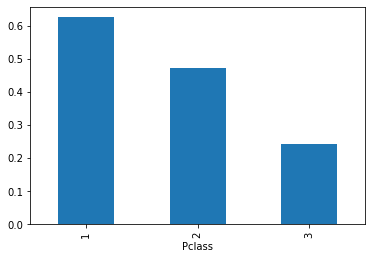

In [443]:
df.groupby(['Pclass'])['Survived'].mean().plot(kind='bar');

>>#### Answer 3: Based on the charts above, we can tell that the ticket class is associated with survival rate. There are more people in the first class who were survived, and much more people in the 3rd class who were died than survived.

>### Question 4: Is age a factor to influence survival rate?

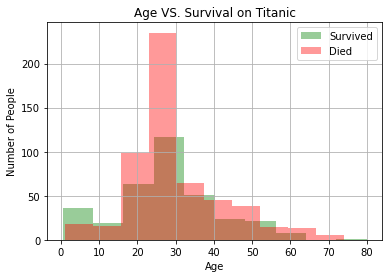

In [20]:
df_survived.Age.hist(alpha = 0.4, color = 'Green', label = 'Survived')
df_died.Age.hist(alpha = 0.4, color = 'Red', label = 'Died')
plt.title ('Age VS. Survival on Titanic')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.legend()

>>#### Answer 4: Younger kids had a higher chance of survival, but other than that, there is no correlation between age and survival rate.

>### Answer 5: Is sex associated with survival?

(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

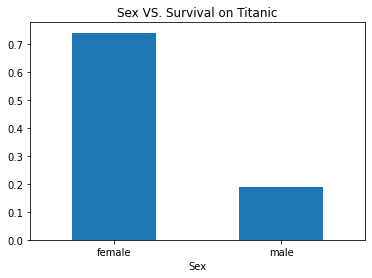

In [445]:
df.groupby(['Sex'])['Survived'].mean().plot(kind = 'bar');
plt.title('Sex VS. Survival on Titanic')
plt.xticks(rotation = 0)

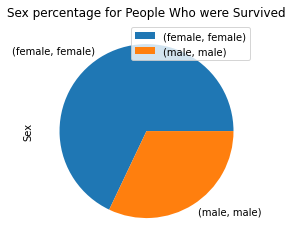

In [23]:
df_survived.groupby(['Sex'])['Sex'].value_counts().plot(kind = 'pie');
plt.title('Sex percentage for People Who were Survived')
plt.legend()

<AxesSubplot:xlabel='Pclass,Sex,Sex'>

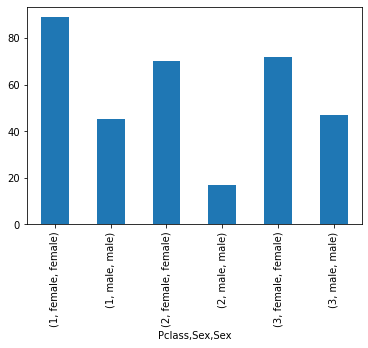

In [447]:
df_survived.groupby(['Pclass', 'Sex'])['Sex'].value_counts().plot(kind = 'bar')

>>#### Answer 5: Yes, sex is associated with survival rate. More woman survived than men for each ticket class. 

>### Question 6: How having family on board associated with survival?

In [448]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


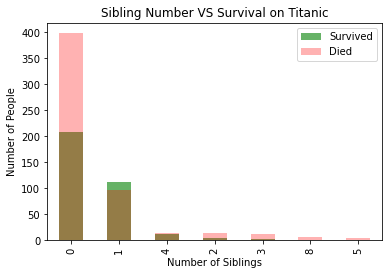

In [26]:
df_survived.SibSp.value_counts().plot(kind='bar', color = 'Green', alpha = 0.6, label = 'Survived')
df_died.SibSp.value_counts().plot(kind = 'bar', color = 'Red', alpha=0.3, label = 'Died')
plt.xlabel('Number of Siblings')
plt.ylabel('Number of People')
plt.title('Sibling Number VS Survival on Titanic')
plt.legend()

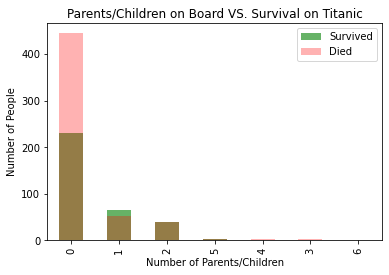

In [27]:
df_survived.Parch.value_counts().plot(kind='bar', color = 'Green', alpha = 0.6, label = 'Survived')
df_died.Parch.value_counts().plot(kind = 'bar', color = 'Red', alpha=0.3, label = 'Died')
plt.title('Parents/Children on Board VS. Survival on Titanic')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Number of People')
plt.legend()

>>#### Answer 6: It seems that people who were with a lot of family members on board didn't survive. People who have 1 sibling/parent/child tends to survive more, but it may related to ticket class or other factors.

>### Question 7: Is the embark location associated with survival?

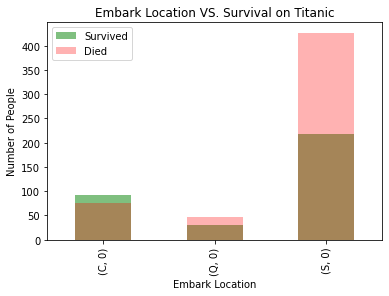

In [28]:
df_survived.groupby(['Embarked'])['Survived'].value_counts().plot(kind='bar', color='Green', alpha=0.5)
df_died.groupby(['Embarked'])['Survived'].value_counts().plot(kind='bar', color='Red', alpha=0.3, label = 'Died')
plt.title('Embark Location VS. Survival on Titanic')
plt.xlabel('Embark Location')
plt.ylabel('Number of People')
plt.legend()

>>#### Answer 7: There were more people survived if they embark at Cherbourg.